In [1]:
# name = ['城镇人均犯罪率','住宅用地所占比例','城镇中非住宅用地所占比例',
#         '虚拟变量,用于回归分析',' 环保指数','每栋住宅的房间数',
#         '1940 年以前建成的自住单位的比例','就业中心的加权距离','高速公路的便利指数',
#        '不动产税率','教师学生比例','黑人比例','多少房东属于低收入人群']

# 随机森林回归器

## 导入相关包&数据集

In [13]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
data = load_boston()
X = data['data']
Y = data['target']
df=pd.DataFrame(X,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.3,random_state=260)

## 建模

这是森林中树的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，
n_estimators越大，模型的效果往往越好。但是相应的，任何模型都有决策边界，n_estimators达到一
定的程度之后，随机森林的精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量
和内存也越大，训练的时间也会越来越长。对于这个参数，我们是渴望在训练难度和模型效果之间取得
平衡。

In [17]:
rfr = RandomForestRegressor(n_estimators=100)

随机森林的接口与决策树完全⼀致，因此依然有四个常⽤接口：apply, fit, predict和score。除此之
外，还需要注意随机森林的predict_proba接口，这个接口返回每个测试样本对应的被分到每⼀类标签的
概率，标签有几个分类就返回几个概率。如果是二分类问题，则 predict_proba 返回的数值⼤于0.5
的，被分为1，小于0.5的，被分为0。传统的随机森林是利⽤袋装法中的规则，平均或少数服从多数来决
定集成的结果，而sklearn中的随机森林是平均每个样本对应的 predict_proba 返回的概率，得到⼀个
平均概率，从而决定测试样本的分类。

In [18]:
rfr.fit(Xtrain,Ytrain)

RandomForestRegressor()

In [19]:
rfr.score(Xtrain,Ytrain)

0.9776265235590138

In [20]:
rfr.score(Xtest,Ytest)

0.8536222452555452

## 对比线性回归

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [22]:
# 标准化
std = StandardScaler().fit(Xtrain)

In [23]:
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [24]:
LR = LinearRegression().fit(Xtrain_,Ytrain)

In [25]:
LR.score(Xtrain_,Ytrain),LR.score(Xtest_,Ytest)

(0.7466012225368416, 0.7032042000754409)

## 交叉验证

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# 随机森林使用交叉验证，设置score为- MSE 进行交叉验证

cross_val_score(rfr,X,Y,cv=5,scoring='neg_mean_absolute_error').mean()


-2.9659834983498343

In [28]:
# 线性回归使用交叉验证，设置score为-MSE 进行交叉验证

cross_val_score(LR,X,Y,cv=5,scoring='neg_mean_absolute_error').mean()


-4.249968544192538

# 画出森林中的某棵树

In [30]:
import pydotplus
from IPython.display import Image
from six import StringIO

In [31]:
name = ['城镇人均犯罪率','住宅用地所占比例','城镇中非住宅用地所占比例',
        '虚拟变量,用于回归分析',' 环保指数','每栋住宅的房间数',
        '1940 年以前建成的自住单位的比例','就业中心的加权距离','高速公路的便利指数',
       '不动产税率','教师学生比例','黑人比例','多少房东属于低收入人群']

In [32]:
from sklearn import tree
import graphviz

In [33]:
dot_data = StringIO()

In [34]:
tree.export_graphviz(rfr.estimators_[1],
                    out_file = dot_data,
                    feature_names=name,
                    filled=True,
                    rounded=True)

In [35]:
#pydotplus.graph_from_dot_data  修改字体
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"FangSong"'))

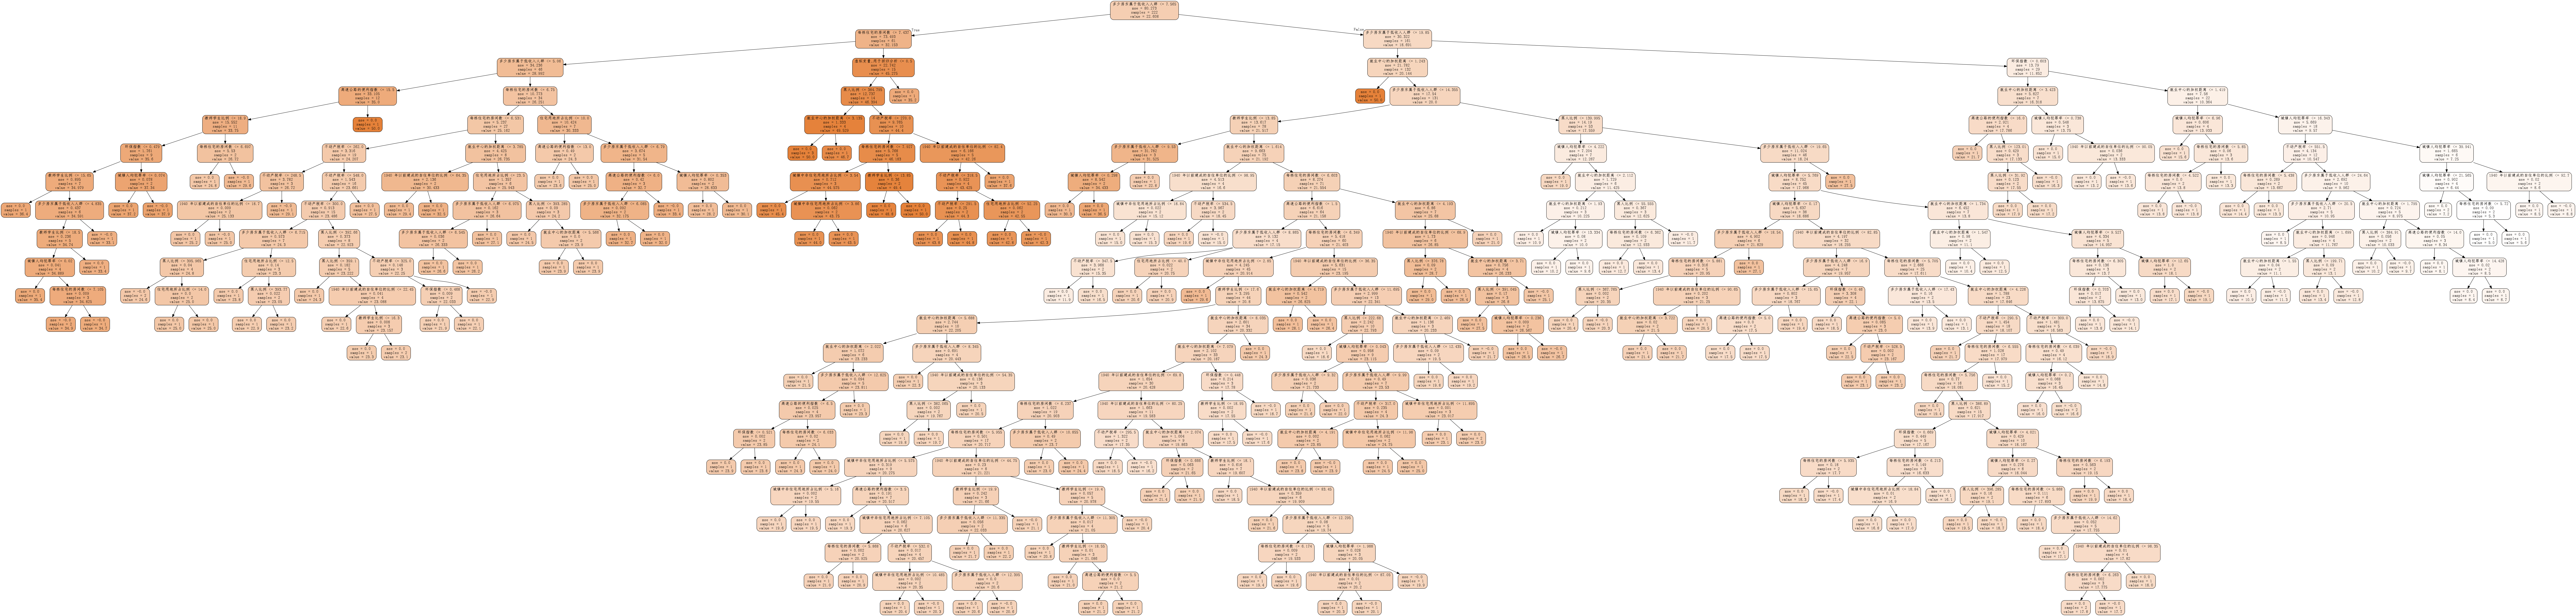

In [36]:
Image(graph.create_png())